In [1]:
#==============================================================================
#
# IMPORT LIBRARIES
# 
#==============================================================================
import time
import pandas as pd
pd.options.display.max_columns = None # Shows all columns
import string as str
import numpy as np
import matplotlib.pyplot as plt
#import csv
#from googletrans import Translator
#import copy
#import numpy as np

In [ ]:
#==============================================================================
# 
# DUMP/LOAD SESSIONS
# 
#==============================================================================

import dill

# ---- FULL SESSIONS ----
# Dump
#dill.dump_session('./working.db')

# Load
#dill.load_session('./working.db')

# ---- OBJECTS ----
# Dump
#dill.dump(df_raw, open("df_raw.pkl", "wb"))

# Load
#dill_file = open("df_raw.pkl", "rb")
#df_raw = dill.load(dill_file)
#dill_file.close()

In [3]:
#==============================================================================
# 
# READ/EXTRACT RAW DATA
# 
#==============================================================================

file_train = 'data/dataset/yes_complete/train.txt'
print(pd.read_table(file_train, nrows=5, header=None))

                                                   0
0  17430147 17277121 17767569 17352501 17567841 1...
1  138 2833 297 502 700 5041 3235 72 1004 2 1 116...
2  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
3  78 79 80 3 62 81 14 82 48 83 84 17 85 86 87 88...
4  211 212 213 59 25 214 215 57 93 216 70 3 81 62...


In [4]:
with open(file_train) as f:
    train_raw = f.readlines()

In [5]:
playlists_train_raw = train_raw[2:]

In [6]:
# How many unique playlists?
print('There are ', len(playlists_train_raw), ' playlists.', sep='')

There are 11137 playlists.


In [7]:
playlists_train_raw[0:2]

['0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 2 42 43 44 45 46 47 48 20 49 8 50 51 52 53 54 55 56 57 25 58 59 60 61 62 3 63 64 65 66 46 47 67 2 48 68 69 70 57 50 71 72 53 73 25 74 59 20 46 75 76 77 59 20 43 \n',
 '78 79 80 3 62 81 14 82 48 83 84 17 85 86 87 88 74 89 90 91 4 73 62 92 17 53 59 93 94 51 50 27 95 48 96 97 98 99 100 57 101 102 25 103 3 104 105 106 107 47 108 109 110 111 112 113 25 63 62 114 115 84 116 117 118 119 120 121 122 123 50 70 71 124 17 85 14 82 48 125 47 46 72 53 25 73 4 126 59 74 20 43 127 128 129 13 82 48 130 131 132 133 134 135 136 137 59 46 138 43 20 139 140 73 57 70 141 3 1 74 142 143 144 145 48 13 25 146 50 147 126 59 20 148 149 150 151 152 56 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 60 176 51 177 178 179 180 181 182 183 184 185 57 186 187 188 189 190 191 46 192 193 194 195 196 197 198 25 199 200 49 201 100 202 203 204 205 206 207 32 208 

In [8]:
len(playlists_train_raw)

11137

In [9]:
# Split playlist IDs and convert to integers
playlists_train_list = []
for i in range(0, len(playlists_train_raw)):
    playlists_train_list.append(list(map(int, playlists_train_raw[i].split())))

In [10]:
len(playlists_train_list)

11137

In [11]:
# Flatmap the playlists list
df_playlists_train = []
for i in range(0, len(playlists_train_list)):
    for j in range(0, len(playlists_train_list[i])):
        df_playlists_train.append([i, playlists_train_list[i][j]])

In [12]:
df_playlists_train = pd.DataFrame(df_playlists_train, columns=['playlist', 'song_id'])

In [13]:
df_playlists_train.head()

,playlist,song_id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [14]:
df_playlists_train.tail()

,playlist,song_id
1887933,11136,27588
1887934,11136,8974
1887935,11136,7402
1887936,11136,6808
1887937,11136,12850


In [15]:
len(df_playlists_train)

1887938

In [16]:
# Create index primary key
df_playlists_train.insert(loc=0, column='index', value=df_playlists_train.index)

In [17]:
df_playlists_train.head()

,index,playlist,song_id
0,0,0,0
1,1,0,1
2,2,0,2
3,3,0,3
4,4,0,4


In [18]:
df_playlists_train.tail()

,index,playlist,song_id
1887933,1887933,11136,27588
1887934,1887934,11136,8974
1887935,1887935,11136,7402
1887936,1887936,11136,6808
1887937,1887937,11136,12850


In [19]:
# ---- Merge songs on song_id ----
pd.read_table('data/dataset/yes_complete/song_hash.txt', nrows=3, header=None)

,0,1,2
0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,2,Get Back Up (w\/ Chris Brown),T.I.


In [20]:
df_song_hash = pd.read_table('data/dataset/yes_complete/song_hash.txt', header=None, names=['song_id','song','band'])

In [21]:
df_song_hash.head()

,song_id,song,band
0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,2,Get Back Up (w\/ Chris Brown),T.I.
3,3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,4,Whip My Hair,Willow


In [22]:
df_song_hash.tail()

,song_id,song,band
75257,75257,Dearest (I'm So Sorry),Picture Me Broken
75258,75258,USA Today,Alan Jackson
75259,75259,Superstar,Raul Malo
75260,75260,Romancin' The Blues,Giacomo Gates
75261,75261,Inner Change,The Jazzmasters


In [23]:
df_song_hash['song_id'].max()

75261

In [24]:
df_playlists_train['song_id'].max()

75261

In [25]:
df_playlists_train.head()

,index,playlist,song_id
0,0,0,0
1,1,0,1
2,2,0,2
3,3,0,3
4,4,0,4


In [26]:
df_playlists_train[df_playlists_train['index']==16511]

,index,playlist,song_id
16511,16511,107,0


In [27]:
df_playlists_train = df_playlists_train.merge(df_song_hash, on='song_id')

In [28]:
df_playlists_train.head()

,index,playlist,song_id,song,band
0,0,0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,16511,107,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
2,22345,133,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
3,22458,134,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
4,22646,134,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane


In [29]:
df_playlists_train.sort_values('index', inplace=True)

In [30]:
df_playlists_train.head()

,index,playlist,song_id,song,band
0,0,0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
138,1,0,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2971,2,0,2,Get Back Up (w\/ Chris Brown),T.I.
3268,3,0,3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
3770,4,0,4,Whip My Hair,Willow


In [31]:
df_playlists_train.reset_index(drop=True, inplace=True)

In [32]:
df_playlists_train.head()

,index,playlist,song_id,song,band
0,0,0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,1,0,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,2,0,2,Get Back Up (w\/ Chris Brown),T.I.
3,3,0,3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,4,0,4,Whip My Hair,Willow


In [51]:
#==============================================================================
#
# EDA
# 
#==============================================================================

In [66]:
song_count = pd.DataFrame(df_playlists_train.groupby(['song', 'band'])['playlist'].count().sort_values(ascending=False))

In [67]:
song_count.head()

,,playlist
song,band,
-,-,8495
Moment 4 Life (w\/ Drake),Nicki Minaj,5593
Down On Me (w\/ 50 Cent),Jeremih,5041
What's My Name (w\/ Drake),Rihanna,4497
Grenade,Bruno Mars,3828


In [68]:
song_count.tail()

,,playlist
song,band,
Ice Pick Willy,Absolute Ensemble,1
Iceblink Luck,Cocteau Twins,1
Iced Lightning,RJD2,1
Time And Time Again,Billy Harper,1
y7,Autechre,1


In [69]:
song_count.reset_index(inplace=True)
song_count.columns = ['song','band', 'count']

In [70]:
song_count.head()

,song,band,count
0,-,-,8495
1,Moment 4 Life (w\/ Drake),Nicki Minaj,5593
2,Down On Me (w\/ 50 Cent),Jeremih,5041
3,What's My Name (w\/ Drake),Rihanna,4497
4,Grenade,Bruno Mars,3828


In [72]:
song_count.sort_values('song')

,song,band,count
9117,2112-,Rush,34
40217,Houses Sing,Danny Schmidt,3
11912,I Got Your Country Right Here,Gretchen Wilson,21
40154,LOL (Smiley Face) (w\/ Gucci Mane & Soulja Boy),Trey Songz,3
47443,Lion Is Burning (w\/ Franz Ferdinand),Orchestre Poly-Rythmo,2
51191,Looking Out,Brandi Carlile,1
8305,Ordinary World,Duran Duran,39
28740,See You Around,Cowboy Junkies,5
10690,The Girls Next Door,Pat Metheny Group,26
50985,The Rabbit's Ear\/ The Stirabout Road\/ Kiss ...,Kevin Burke & Cal Scott,1


Text(0.5,1,'')

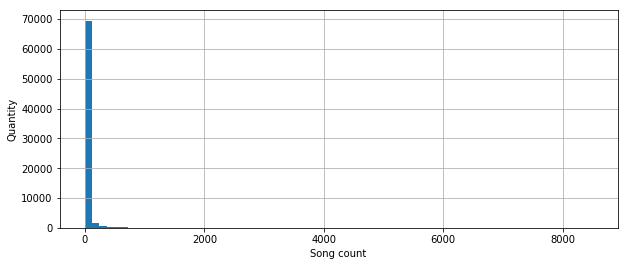

In [73]:
plt.figure(figsize=(10,4))
song_count['count'].hist(bins=70)
plt.xlabel('Song count')
plt.ylabel('Quantity')
plt.title('')

(0, 25)

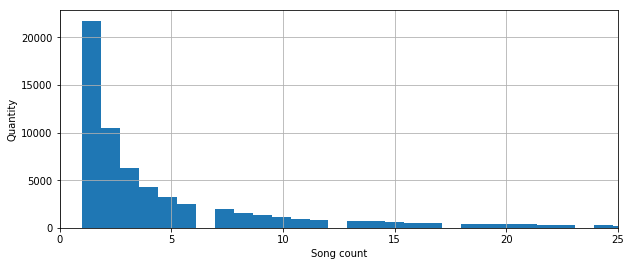

In [77]:
plt.figure(figsize=(10,4))
song_count['count'].hist(bins=10000)
plt.xlabel('Song count')
plt.ylabel('Quantity')
plt.title('')
plt.xlim(0,25)

Text(0.5,1,'')

<Figure size 720x288 with 0 Axes>

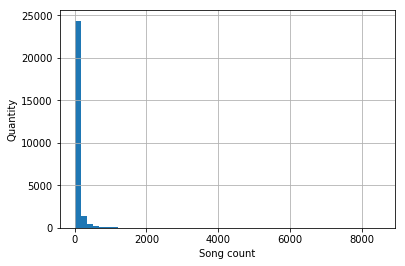

In [78]:
plt.figure(figsize=(10,4))
song_count[song_count['count'] > 5].hist(bins=50)
plt.xlabel('Song count')
plt.ylabel('Quantity')
plt.title('')

In [79]:
band_count = pd.DataFrame(df_playlists_train.groupby('band')['playlist'].count().sort_values(ascending=False))

In [80]:
band_count.reset_index(inplace=True)
band_count.columns = ['band','count']

In [81]:
band_count.head()

,band,count
0,Rihanna,12550
1,Nicki Minaj,10228
2,Kenny Chesney,10181
3,Brad Paisley,9128
4,Chris Brown,9096


Text(0.5,1,'')

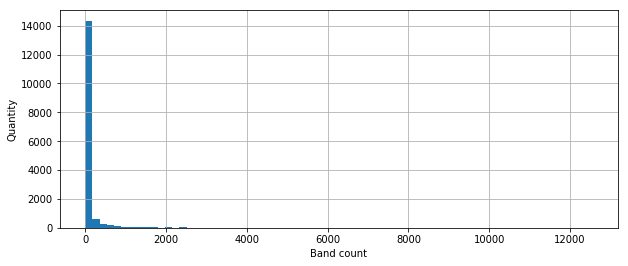

In [82]:
plt.figure(figsize=(10,4))
band_count['count'].hist(bins=70)
plt.xlabel('Band count')
plt.ylabel('Quantity')
plt.title('')

(0, 100)

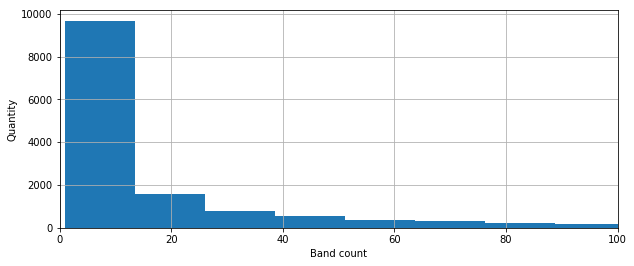

In [83]:
plt.figure(figsize=(10,4))
band_count['count'].hist(bins=1000)
plt.xlabel('Band count')
plt.ylabel('Quantity')
plt.title('')
plt.xlim(0,100)

In [ ]:
#==============================================================================
#
# CLEAN DATA
# 
#==============================================================================

In [84]:
len(df_playlists_train)

1887938

In [85]:
song_count['count'].sum()

1887848

In [86]:
# What happened to the difference?
len(df_playlists_train) - song_count['count'].sum()

90

In [88]:
# ---- PARE DATA ----
# Remove songs that show up less than 6 times
song_count_6 = song_count[song_count['count']>=6]

In [89]:
song_count_6.head()

,song,band,count
0,-,-,8495
1,Moment 4 Life (w\/ Drake),Nicki Minaj,5593
2,Down On Me (w\/ 50 Cent),Jeremih,5041
3,What's My Name (w\/ Drake),Rihanna,4497
4,Grenade,Bruno Mars,3828


In [90]:
song_count_6.tail()

,song,band,count
26662,Derrotado Corazon,Los Invasores De Nuevo Leon,6
26663,Isi,Juan Gabriel,6
26664,One Fine Day,The Chiffons,6
26665,Beware,Tarrus Riley,6
26666,Dazzling Blue,Paul Simon,6


In [91]:
df_playlists_train.head()

,index,playlist,song_id,song,band
0,0,0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,1,0,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,2,0,2,Get Back Up (w\/ Chris Brown),T.I.
3,3,0,3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,4,0,4,Whip My Hair,Willow


In [92]:
df_playlists_train = pd.merge(df_playlists_train, song_count_6)

In [93]:
df_playlists_train.head()

,index,playlist,song_id,song,band,count
0,0,0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,138
1,16511,107,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,138
2,22345,133,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,138
3,22458,134,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,138
4,22646,134,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,138


In [94]:
df_playlists_train.sort_values(by='index', inplace=True)

In [95]:
df_playlists_train.reset_index(drop=True, inplace=True)

In [96]:
df_playlists_train.head()

,index,playlist,song_id,song,band,count
0,0,0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,138
1,1,0,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross,2833
2,2,0,2,Get Back Up (w\/ Chris Brown),T.I.,297
3,3,0,3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher,502
4,4,0,4,Whip My Hair,Willow,700


In [97]:
df_playlists_train.tail()

,index,playlist,song_id,song,band,count
1792949,1887933,11136,27588,This Love Is Free,Hyland,188
1792950,1887934,11136,8974,"O, For A Thousand Tongues To Sing",David Crowder Band,23
1792951,1887935,11136,7402,What It Means,Jeremy Camp,144
1792952,1887936,11136,6808,Everything Falls,Fee,303
1792953,1887937,11136,12850,Matchless,Aaron Shust,39


In [98]:
len(df_playlists_train)

1792954

In [99]:
song_count_6['count'].sum()

1792954

In [83]:
# ---- REMOVE NULLS ----

In [101]:
df_playlists_train.isnull().sum().sum()

0

In [102]:
df_playlists_train.isna().sum().sum()

0

In [106]:
# ---- REMOVE "", " ", "-" ----
df_playlists_train[df_playlists_train['song'] == '-'].head()

,index,playlist,song_id,song,band,count
63522,66442,359,13382,-,-,8495
63707,66627,360,13382,-,-,8495
63920,66841,360,13382,-,-,8495
64251,67175,361,13382,-,-,8495
64356,67281,362,13382,-,-,8495


In [107]:
df_playlists_train.drop(df_playlists_train[df_playlists_train['song']=='-'].index, inplace=True)

In [108]:
df_playlists_train[df_playlists_train['song'] == '-']

,index,playlist,song_id,song,band,count


In [110]:
df_playlists_train[df_playlists_train['band'] == '-'].head()

,index,playlist,song_id,song,band,count
407063,424397,2383,37365,MG_DELETED,-,76
442943,463181,2641,39990,MG_DELETED,-,76
507881,532401,3077,43786,Take Me In Your Arms (Rock Me For A Little While),-,7
508487,533290,3083,43786,Take Me In Your Arms (Rock Me For A Little While),-,7
670863,707103,4154,43786,Take Me In Your Arms (Rock Me For A Little While),-,7


In [111]:
df_playlists_train.drop(df_playlists_train[df_playlists_train['band']=='-'].index, inplace=True)

In [112]:
df_playlists_train[df_playlists_train['band']=='-']

,index,playlist,song_id,song,band,count


In [113]:
df_playlists_train[df_playlists_train['song']=='']

,index,playlist,song_id,song,band,count


In [114]:
df_playlists_train[df_playlists_train['band']=='']

,index,playlist,song_id,song,band,count


In [115]:
df_playlists_train[df_playlists_train['song']==' ']

,index,playlist,song_id,song,band,count


In [116]:
df_playlists_train[df_playlists_train['band']==' ']

,index,playlist,song_id,song,band,count
